In [828]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [829]:
##########################################################################

In [830]:
#balanced + unbalanced -- online only

In [831]:
##########################################################################

In [832]:
#import excel file containing data summary

wtpdata = pd.read_csv(r'ALL_data_WTP_01212022.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)

                  participant  balanced  avg_spent_social  \
0    549ea92efdf99b4ffa5fa208         0          0.032000   
1    55a43687fdf99b7da1908e0f         0          0.018889   
2    55ea70c37480920010aa9982         0          0.031000   
3    56259489ed6e5a0005c80fde         1          0.026250   
4    566c9284d408ea000519c6d7         0          0.018889   
5    56f745653bd969000d170c15         0          0.033333   
6    57e972d7c3e5930001447bb1         0          0.030000   
7    58060d08b869700001d70b8c         1          0.030357   
8    58ab75c4ef58a9000119d16c         0          0.023684   
9    5914b7b50a4b9d0001add64f         1          0.020870   
10   5a78e410ae9a0b0001a97274         1          0.036190   
11   5adbc051f6b58c0001fa3bbe         1          0.031111   
12   5af529ca222e4d0001878444         1          0.024286   
13   5b48f2d0ff7497000125165e         1          0.030833   
14   5bb0c112a1c73d0001b9ce9e         1          0.031875   
15   5beaed3f0af61d00019

In [833]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.029238428182
standard error of the mean: 0.000322584372


In [834]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences


nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))

group mean: 0.028678335190
standard error of the mean: 0.000296740882


In [835]:
#sample size
n = len(wtpdata)
print(n)

274


In [836]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0038400375346079917 0.15346548000000013
0.0037082635148245947


In [837]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0002240243917195754


In [838]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

2.500142901411514


In [839]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

273


In [840]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=2.500, df=273, cv=1.650, p=0.013
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


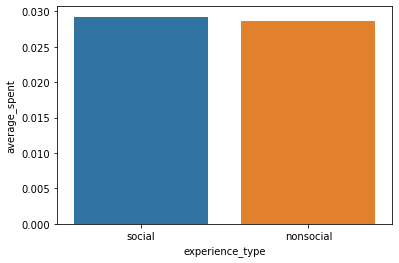

In [841]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [842]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.10917376360781351


In [843]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support
iri_pd = wtpdata.IRI_PD
iri_fs= wtpdata.IRI_FS
iri_ec= wtpdata.IRI_EC
iri_pt=wtpdata.IRI_PT

In [844]:
### average spent on social / self report ####

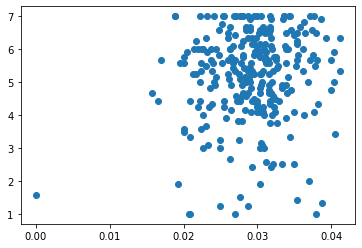

[[2.85126255e-05 8.05402430e-04]
 [8.05402430e-04 1.94053375e+00]]
Pearsons correlation: 0.108
p value: 0.0736
Reject the null hypothesis that the means are equal.


In [845]:
# avg amount spent on social / mspss
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




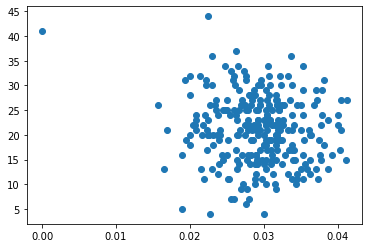

[[ 2.85126255e-05 -4.25326124e-03]
 [-4.25326124e-03  4.73420630e+01]]
Pearsons correlation: -0.116
p value: 0.0556
Reject the null hypothesis that the means are equal.


In [846]:
#avg amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

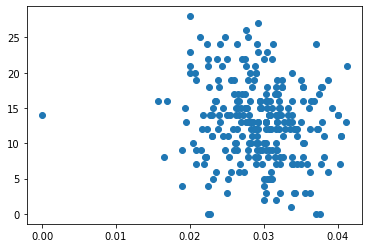

[[ 2.85126255e-05 -3.77841940e-03]
 [-3.77841940e-03  3.09668191e+01]]
Pearsons correlation: -0.127
p value: 0.0354
Reject the null hypothesis that the means are equal.


In [847]:
#avg amount spent on social / iri_pd
pyplot.scatter(socialavg, iri_pd)
pyplot.show()
covariance = cov(socialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




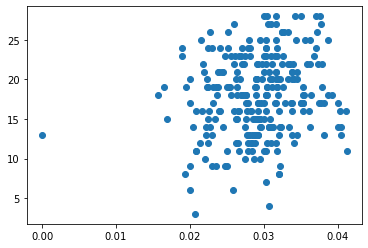

[[2.85126255e-05 4.86770270e-03]
 [4.86770270e-03 2.57811422e+01]]
Pearsons correlation: 0.180
p value: 0.0029
Reject the null hypothesis that the means are equal.


In [848]:
#avg amount spent on social / iri_pt
pyplot.scatter(socialavg, iri_pt)
pyplot.show()
covariance = cov(socialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




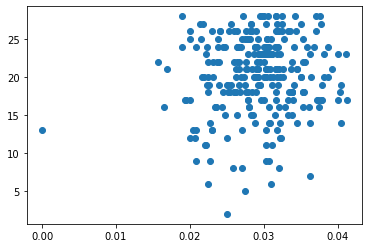

[[2.85126255e-05 2.59984062e-03]
 [2.59984062e-03 2.53330793e+01]]
Pearsons correlation: 0.097
p value: 0.1101
Accept null hypothesis that the means are equal.


In [849]:
#avg amount spent on social / iri_ec
pyplot.scatter(socialavg, iri_ec)
pyplot.show()
covariance = cov(socialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(socialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




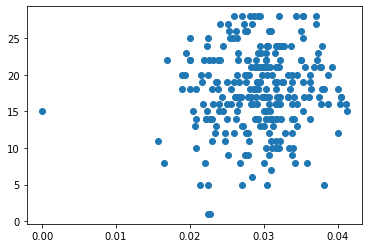

[[2.85126255e-05 2.31885546e-03]
 [2.31885546e-03 2.98025721e+01]]
Pearsons correlation: 0.080
p value: 0.1892
Accept null hypothesis that the means are equal.


In [850]:
#avg amount spent on social / iri_fs
pyplot.scatter(socialavg, iri_fs)
pyplot.show()
covariance = cov(socialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(socialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




In [851]:
##### prop of chosen social // self report #####

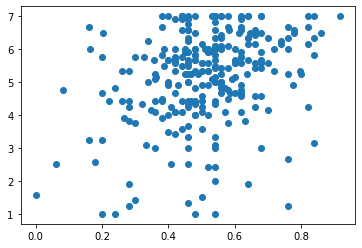

[[0.02344077 0.06601812]
 [0.06601812 1.94053375]]
Pearsons correlation: 0.310
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [852]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

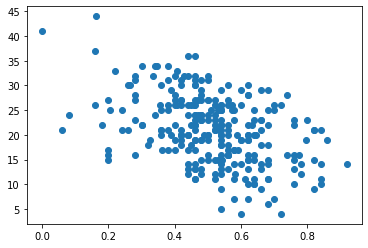

[[ 2.34407713e-02 -4.65062953e-01]
 [-4.65062953e-01  4.73420630e+01]]
Pearsons correlation: -0.441
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [853]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [854]:
##### avg spent on nonsocial // self report #####

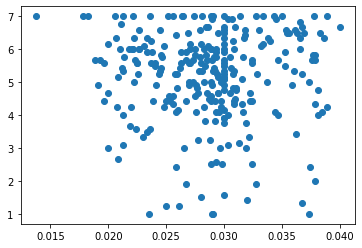

[[ 2.41271114e-05 -1.53185021e-04]
 [-1.53185021e-04  1.94053375e+00]]
Pearsons correlation: -0.022
p value: 0.7122
Accept null hypothesis that the means are equal.


In [855]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

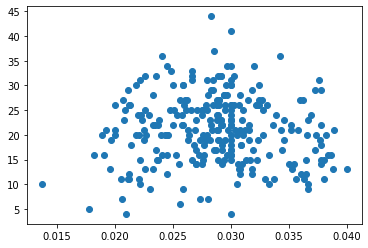

[[ 2.41271114e-05 -5.19657280e-04]
 [-5.19657280e-04  4.73420630e+01]]
Pearsons correlation: -0.015
p value: 0.8000
Accept null hypothesis that the means are equal.


In [856]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

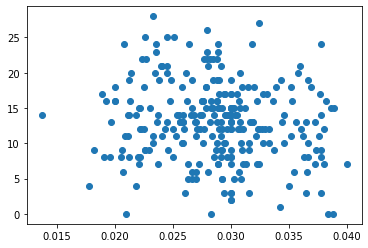

[[ 2.41271114e-05 -3.55185608e-03]
 [-3.55185608e-03  3.09668191e+01]]
Pearsons correlation: -0.130
p value: 0.0315
Reject the null hypothesis that the means are equal.


In [857]:
# nonsocial // iri_pd
pyplot.scatter(nonsocialavg, iri_pd)
pyplot.show()
covariance = cov(nonsocialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

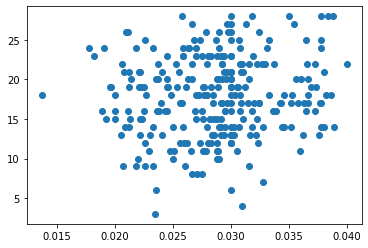

[[2.41271114e-05 2.73330098e-03]
 [2.73330098e-03 2.57811422e+01]]
Pearsons correlation: 0.110
p value: 0.0701
Reject the null hypothesis that the means are equal.


In [858]:
# nonsocial // iri_pt
pyplot.scatter(nonsocialavg, iri_pt)
pyplot.show()
covariance = cov(nonsocialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

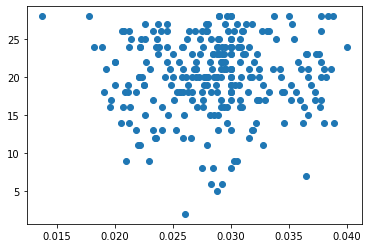

[[2.41271114e-05 6.13943225e-04]
 [6.13943225e-04 2.53330793e+01]]
Pearsons correlation: 0.025
p value: 0.6824
Accept null hypothesis that the means are equal.


In [859]:
# nonsocial // iri_ec
pyplot.scatter(nonsocialavg, iri_ec)
pyplot.show()
covariance = cov(nonsocialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

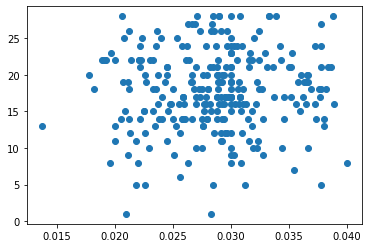

[[2.41271114e-05 1.41775723e-03]
 [1.41775723e-03 2.98025721e+01]]
Pearsons correlation: 0.053
p value: 0.3833
Accept null hypothesis that the means are equal.


In [860]:
# nonsocial // iri_fs
pyplot.scatter(nonsocialavg, iri_fs)
pyplot.show()
covariance = cov(nonsocialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [861]:
###################################

In [862]:
#### t stat for proportions ####

In [863]:
prop_socialavg= wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocialavg= wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.511765373438
mean: 0.488234626562


In [864]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

25.749035023695313 6.4474246440000025
0.3062075854243544


In [865]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.018498676750013997


In [866]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

1.2720232476030828


In [867]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

273


In [868]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.272, df=273, cv=1.650, p=0.204
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


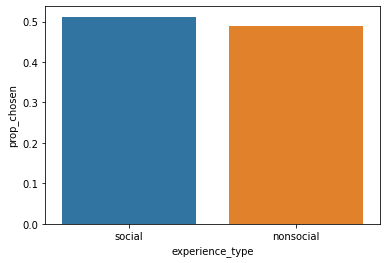

In [869]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.prop_chosen, data=wtp_means)


In [870]:
###################################

In [871]:
#### t stats for sums #####

In [872]:
social_sum= wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))

mean: 0.748321167883


In [873]:
nonsocial_sum= wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.695766423358


In [874]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

57.6716 14.400000000000002


In [875]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.4565951857594709


In [876]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.027583923942549257


In [877]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

1.9052671634030909


In [878]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

273


In [879]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.905, df=273, cv=1.650, p=0.058
Reject the null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


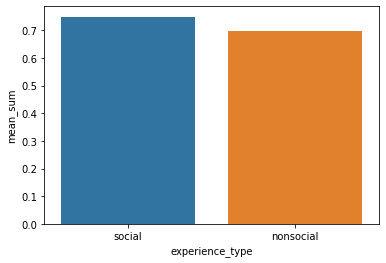

In [880]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)


In [881]:
#### sum // self-report ####

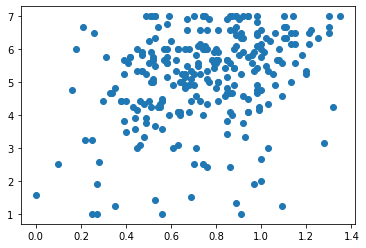

[[0.0677393  0.1063267 ]
 [0.1063267  1.94053375]]
Pearsons correlation: 0.293
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [882]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

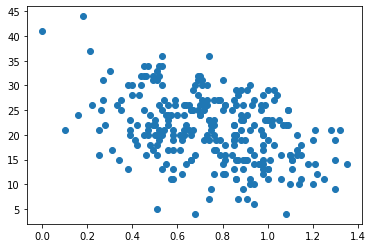

[[ 0.0677393  -0.72255742]
 [-0.72255742 47.34206305]]
Pearsons correlation: -0.403
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [883]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

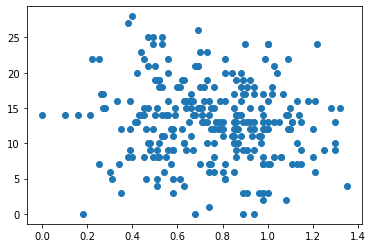

[[ 0.0677393  -0.16133071]
 [-0.16133071 30.96681907]]
Pearsons correlation: -0.111
p value: 0.0656
Reject the null hypothesis that the means are equal.


In [884]:
#sum of social / iri_pd
pyplot.scatter(social_sum, iri_pd)
pyplot.show()
covariance = cov(social_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

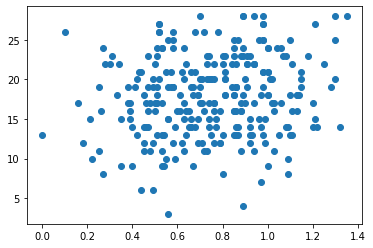

[[ 0.0677393   0.21295901]
 [ 0.21295901 25.78114222]]
Pearsons correlation: 0.161
p value: 0.0075
Reject the null hypothesis that the means are equal.


In [885]:
#sum of social / iri_pt
pyplot.scatter(social_sum, iri_pt)
pyplot.show()
covariance = cov(social_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

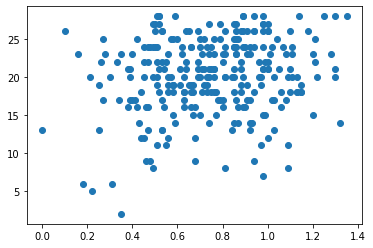

[[ 0.0677393   0.22962889]
 [ 0.22962889 25.33307933]]
Pearsons correlation: 0.175
p value: 0.0036
Reject the null hypothesis that the means are equal.


In [886]:
#sum of social / iri_ec
pyplot.scatter(social_sum, iri_ec)
pyplot.show()
covariance = cov(social_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(social_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

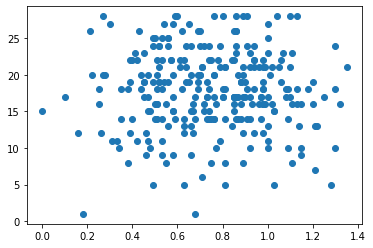

[[ 6.77392957e-02 -2.20175931e-02]
 [-2.20175931e-02  2.98025721e+01]]
Pearsons correlation: -0.015
p value: 0.7985
Accept null hypothesis that the means are equal.


In [887]:
#sum of social / iri_fs
pyplot.scatter(social_sum, iri_fs)
pyplot.show()
covariance = cov(social_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(social_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

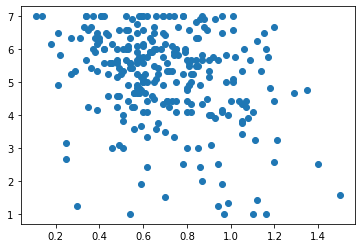

[[ 0.06162523 -0.10186065]
 [-0.10186065  1.94053375]]
Pearsons correlation: -0.295
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [888]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

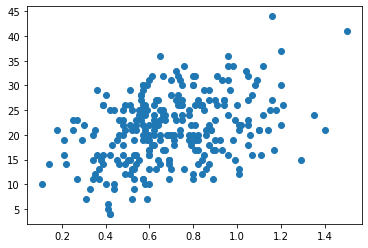

[[ 0.06162523  0.65302211]
 [ 0.65302211 47.34206305]]
Pearsons correlation: 0.382
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [889]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

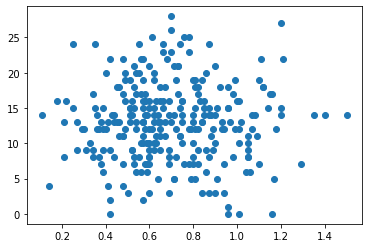

[[ 6.16252346e-02 -4.15042379e-03]
 [-4.15042379e-03  3.09668191e+01]]
Pearsons correlation: -0.003
p value: 0.9605
Accept null hypothesis that the means are equal.


In [890]:
#sum of nonsocial  / iri_pd
pyplot.scatter(nonsocial_sum, iri_pd)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

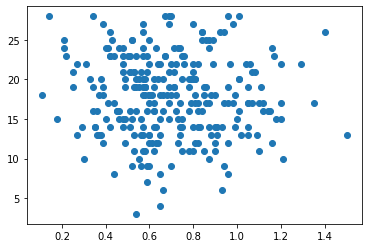

[[ 0.06162523 -0.0661247 ]
 [-0.0661247  25.78114222]]
Pearsons correlation: -0.052
p value: 0.3870
Accept null hypothesis that the means are equal.


In [891]:
#sum of nonsocial  / iri_pt
pyplot.scatter(nonsocial_sum, iri_pt)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

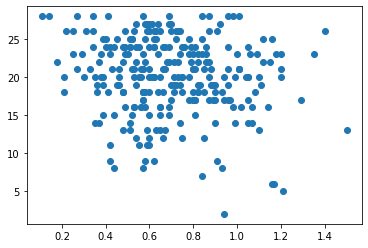

[[ 0.06162523 -0.18636347]
 [-0.18636347 25.33307933]]
Pearsons correlation: -0.149
p value: 0.0135
Reject the null hypothesis that the means are equal.


In [892]:
#sum of nonsocial  / iri_ec
pyplot.scatter(nonsocial_sum, iri_ec)
pyplot.show()
covariance = cov(nonsocial_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

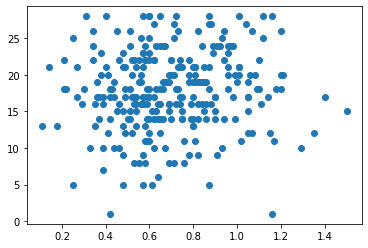

[[ 0.06162523  0.1067787 ]
 [ 0.1067787  29.80257212]]
Pearsons correlation: 0.079
p value: 0.1935
Accept null hypothesis that the means are equal.


In [893]:
#sum of nonsocial  / iri_fs
pyplot.scatter(nonsocial_sum, iri_fs)
pyplot.show()
covariance = cov(nonsocial_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [894]:
##########################################################################

In [895]:
# study 1 only

In [896]:
##########################################################################

In [897]:
#import excel file containing data summary

old_wtpdata = pd.read_csv(r'old_wtp_data.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(old_wtpdata)


                 participant  avg_spent_social  avg_spent_nonsocial  \
0   549ea92efdf99b4ffa5fa208          0.032000             0.030333   
1   55a43687fdf99b7da1908e0f          0.018889             0.018261   
2   55ea70c37480920010aa9982          0.031000             0.029250   
3   566c9284d408ea000519c6d7          0.018889             0.017826   
4   56f745653bd969000d170c15          0.033333             0.028929   
5   57e972d7c3e5930001447bb1          0.030000             0.028235   
6   58ab75c4ef58a9000119d16c          0.023684             0.022667   
7   5c510d1310223b00012fa23e          0.028684             0.025000   
8   5cb33d40f173240019513957          0.022593             0.020000   
9   5cc166b25899270017dd60e2          0.032174             0.028889   
10  5cfecc1e96681500168a1799          0.038696             0.036667   
11  5d305152b2cfe00019231a2a          0.029231             0.025833   
12  5da23c68cf775d001724d361          0.016957             0.019259   
13  5d

In [898]:
socialavg= old_wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.029434022253
standard error of the mean: 0.000592308364


In [899]:
nonsocialavg = old_wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
old_nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))


group mean: 0.028678335190
standard error of the mean: 0.000532496742


In [900]:
#sample size
n = len(old_wtpdata)
print(n)

99


In [901]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0015094637806093976 0.22642225800000002
0.003180962026622228


In [902]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00031969871256589197


In [903]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

2.3637475943494013


In [904]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

98


In [905]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=2.364, df=98, cv=1.661, p=0.020
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


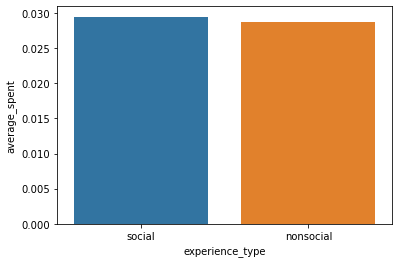

In [906]:
old_wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

old_wtp_plot = sns.barplot(x=old_wtp_means.experience_type, y=old_wtp_means.average_spent, data=old_wtp_means)

In [907]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.4081369405400209


In [908]:
prop_social = old_wtpdata['prop_social']
aq = old_wtpdata.AQ #autism quotient
mspss = old_wtpdata.MSPSS #perceived social support
iri_pd = old_wtpdata.IRI_PD
iri_fs= old_wtpdata.IRI_FS
iri_ec= old_wtpdata.IRI_EC
iri_pt= old_wtpdata.IRI_PT

In [909]:
### average spent on social / self report ####

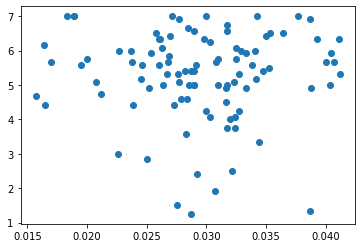

[[ 3.47320906e-05 -1.41126759e-04]
 [-1.41126759e-04  1.66420507e+00]]
Pearsons correlation: -0.019
p value: 0.8553
Accept null hypothesis that the means are equal.


In [910]:
# avg amount spent on social / mspss
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


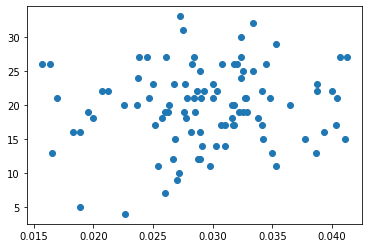

[[3.47320906e-05 3.67412898e-03]
 [3.67412898e-03 3.29610390e+01]]
Pearsons correlation: 0.109
p value: 0.2847
Accept null hypothesis that the means are equal.


In [911]:
#avg amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

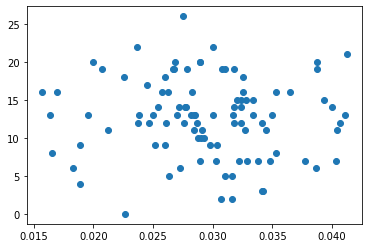

[[ 3.47320906e-05 -1.28872026e-03]
 [-1.28872026e-03  2.66798598e+01]]
Pearsons correlation: -0.042
p value: 0.6774
Accept null hypothesis that the means are equal.


In [912]:
#avg amount spent on social / iri_pd
pyplot.scatter(socialavg, iri_pd)
pyplot.show()
covariance = cov(socialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




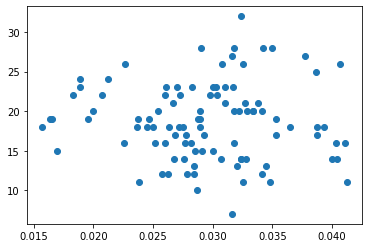

[[ 3.47320906e-05 -1.09293562e-03]
 [-1.09293562e-03  2.34825809e+01]]
Pearsons correlation: -0.038
p value: 0.7069
Accept null hypothesis that the means are equal.


In [913]:
#avg amount spent on social / iri_pt
pyplot.scatter(socialavg, iri_pt)
pyplot.show()
covariance = cov(socialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


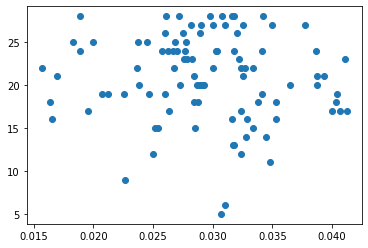

[[ 3.47320906e-05 -2.51962965e-03]
 [-2.51962965e-03  2.55788497e+01]]
Pearsons correlation: -0.085
p value: 0.4055
Accept null hypothesis that the means are equal.


In [914]:
#avg amount spent on social / iri_ec
pyplot.scatter(socialavg, iri_ec)
pyplot.show()
covariance = cov(socialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(socialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




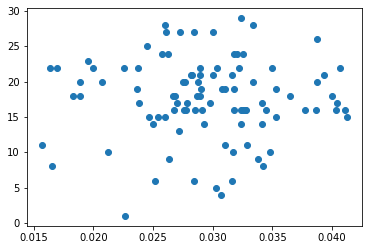

[[3.47320906e-05 1.49400603e-04]
 [1.49400603e-04 3.24677386e+01]]
Pearsons correlation: 0.004
p value: 0.9651
Accept null hypothesis that the means are equal.


In [915]:
#avg amount spent on social / iri_fs
pyplot.scatter(socialavg, iri_fs)
pyplot.show()
covariance = cov(socialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(socialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




In [916]:
##### prop of chosen social // self report #####

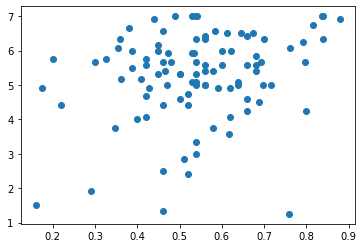

[[0.02209199 0.04582321]
 [0.04582321 1.66420507]]
Pearsons correlation: 0.239
p value: 0.0172
Reject the null hypothesis that the means are equal.


In [917]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

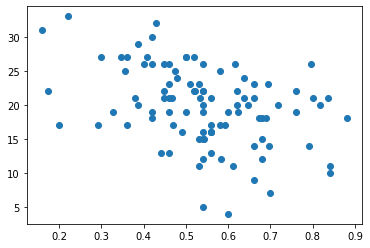

[[ 2.20919888e-02 -3.37081844e-01]
 [-3.37081844e-01  3.29610390e+01]]
Pearsons correlation: -0.395
p value: 0.0001
Reject the null hypothesis that the means are equal.


In [918]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

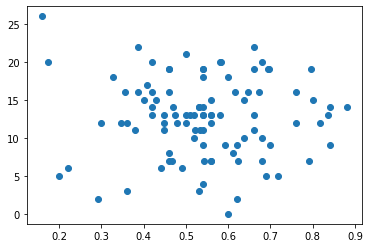

[[ 2.20919888e-02 -3.04104632e-02]
 [-3.04104632e-02  2.66798598e+01]]
Pearsons correlation: -0.040
p value: 0.6971
Accept null hypothesis that the means are equal.


In [919]:
# prop social // iri_pd
pyplot.scatter(prop_social, iri_pd)
pyplot.show()
covariance = cov(prop_social, iri_pd)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pd)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

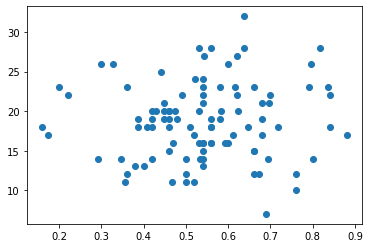

[[2.20919888e-02 4.26066752e-02]
 [4.26066752e-02 2.34825809e+01]]
Pearsons correlation: 0.059
p value: 0.5608
Accept null hypothesis that the means are equal.


In [920]:
# prop social // iri_pt
pyplot.scatter(prop_social, iri_pt)
pyplot.show()
covariance = cov(prop_social, iri_pt)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pt)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

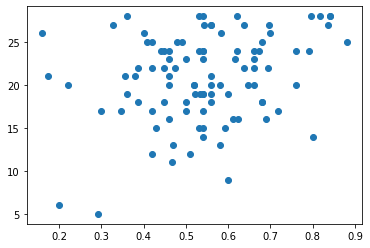

[[2.20919888e-02 2.03924143e-01]
 [2.03924143e-01 2.55788497e+01]]
Pearsons correlation: 0.271
p value: 0.0066
Reject the null hypothesis that the means are equal.


In [921]:
# prop social // iri_ec
pyplot.scatter(prop_social, iri_ec)
pyplot.show()
covariance = cov(prop_social, iri_ec)
print(covariance)
corr, _ = pearsonr(prop_social, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_ec)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

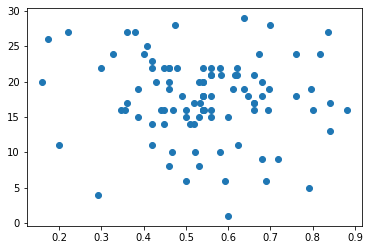

[[ 2.20919888e-02 -8.21491915e-02]
 [-8.21491915e-02  3.24677386e+01]]
Pearsons correlation: -0.097
p value: 0.3395
Accept null hypothesis that the means are equal.


In [922]:
# prop social // iri_fs
pyplot.scatter(prop_social, iri_fs)
pyplot.show()
covariance = cov(prop_social, iri_fs)
print(covariance)
corr, _ = pearsonr(prop_social, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_fs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [923]:
##### avg spent on nonsocial // self report #####

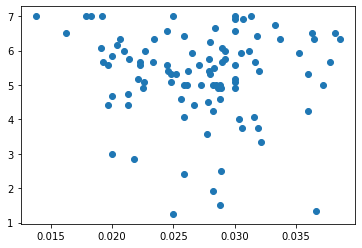

[[ 2.80717253e-05 -5.61503819e-04]
 [-5.61503819e-04  1.66420507e+00]]
Pearsons correlation: -0.082
p value: 0.4189
Accept null hypothesis that the means are equal.


In [924]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

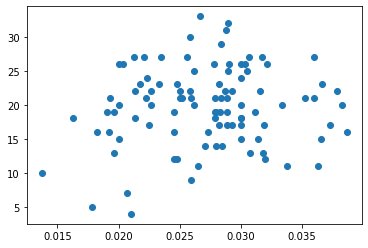

[[2.80717253e-05 3.41828267e-03]
 [3.41828267e-03 3.29610390e+01]]
Pearsons correlation: 0.112
p value: 0.2681
Accept null hypothesis that the means are equal.


In [925]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

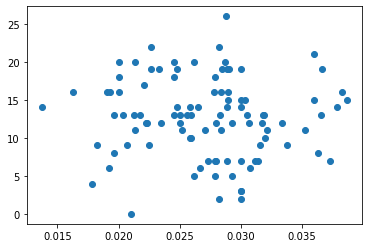

[[ 2.80717253e-05 -1.35364966e-03]
 [-1.35364966e-03  2.66798598e+01]]
Pearsons correlation: -0.049
p value: 0.6268
Accept null hypothesis that the means are equal.


In [926]:
# nonsocial // iri_pd
pyplot.scatter(nonsocialavg, iri_pd)
pyplot.show()
covariance = cov(nonsocialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

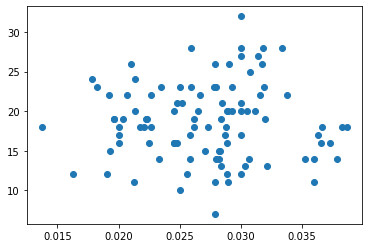

[[2.80717253e-05 8.65706999e-06]
 [8.65706999e-06 2.34825809e+01]]
Pearsons correlation: 0.000
p value: 0.9974
Accept null hypothesis that the means are equal.


In [927]:
# nonsocial // iri_pt
pyplot.scatter(nonsocialavg, iri_pt)
pyplot.show()
covariance = cov(nonsocialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

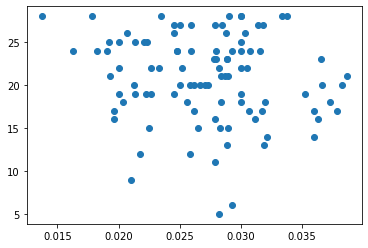

[[ 2.80717253e-05 -3.74472925e-03]
 [-3.74472925e-03  2.55788497e+01]]
Pearsons correlation: -0.140
p value: 0.1677
Accept null hypothesis that the means are equal.


In [928]:
# nonsocial // iri_ec
pyplot.scatter(nonsocialavg, iri_ec)
pyplot.show()
covariance = cov(nonsocialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

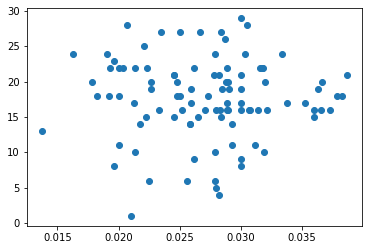

[[ 2.80717253e-05 -2.47413362e-04]
 [-2.47413362e-04  3.24677386e+01]]
Pearsons correlation: -0.008
p value: 0.9358
Accept null hypothesis that the means are equal.


In [929]:
# nonsocial // iri_fs
pyplot.scatter(nonsocialavg, iri_fs)
pyplot.show()
covariance = cov(nonsocialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [930]:
###################################

In [931]:
#### t stat for proportions ####

In [932]:
prop_socialavg= old_wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocialavg= old_wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.541585256747
mean: 0.458414743253


In [933]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

9.344875723412375 8.233880836
0.29726748118429197


In [934]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.029876505983706975


In [935]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

2.7838099120528406


In [936]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

98


In [937]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=2.784, df=98, cv=1.661, p=0.006
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


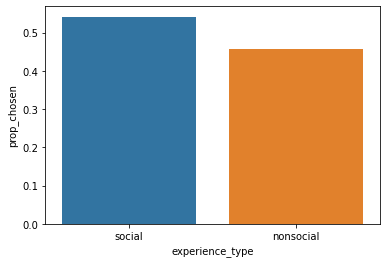

In [938]:
old_prop_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

old_prop_wtp_plot = sns.barplot(x=old_prop_means.experience_type, y=old_prop_means.prop_chosen, data=old_prop_means)


In [939]:
###################################

In [940]:
#### t stats for sums #####

In [941]:
social_sum= old_wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))

mean: 0.776363636364


In [942]:
nonsocial_sum= old_wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.608181818182


In [943]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

19.781099999999988 16.650000000000006


In [944]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.416262190815816


In [945]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0418359242832541


In [946]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

4.020033525329266


In [947]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

98


In [948]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=4.020, df=98, cv=1.661, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


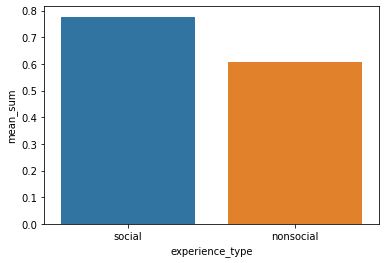

In [949]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)


In [950]:
#### sum // self-report ####

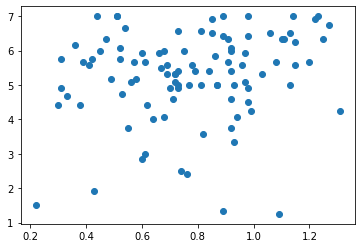

[[0.06540093 0.05968197]
 [0.05968197 1.66420507]]
Pearsons correlation: 0.181
p value: 0.0731
Reject the null hypothesis that the means are equal.


In [951]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

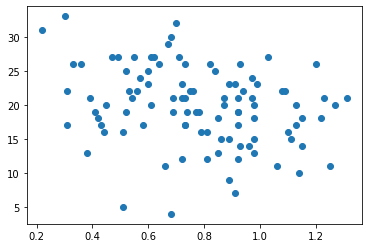

[[ 0.06540093 -0.3935436 ]
 [-0.3935436  32.96103896]]
Pearsons correlation: -0.268
p value: 0.0073
Reject the null hypothesis that the means are equal.


In [952]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

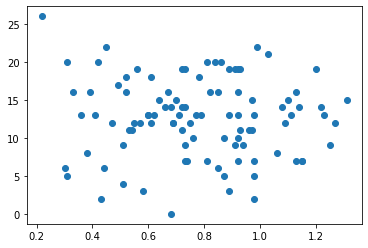

[[ 0.06540093 -0.0690538 ]
 [-0.0690538  26.67985982]]
Pearsons correlation: -0.052
p value: 0.6073
Accept null hypothesis that the means are equal.


In [953]:
#sum of social / iri_pd
pyplot.scatter(social_sum, iri_pd)
pyplot.show()
covariance = cov(social_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

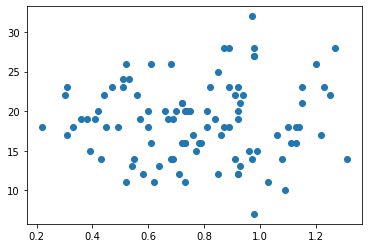

[[ 0.06540093  0.04599258]
 [ 0.04599258 23.48258091]]
Pearsons correlation: 0.037
p value: 0.7153
Accept null hypothesis that the means are equal.


In [954]:
#sum of social / iri_pt
pyplot.scatter(social_sum, iri_pt)
pyplot.show()
covariance = cov(social_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

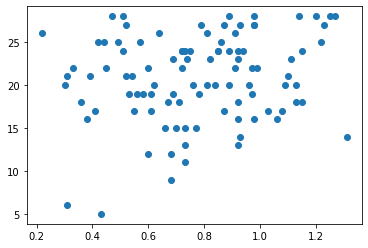

[[ 0.06540093  0.24647495]
 [ 0.24647495 25.57884972]]
Pearsons correlation: 0.191
p value: 0.0588
Reject the null hypothesis that the means are equal.


In [955]:
#sum of social / iri_ec
pyplot.scatter(social_sum, iri_ec)
pyplot.show()
covariance = cov(social_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(social_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

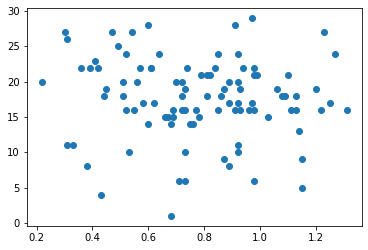

[[ 0.06540093 -0.11954545]
 [-0.11954545 32.46773861]]
Pearsons correlation: -0.082
p value: 0.4195
Accept null hypothesis that the means are equal.


In [956]:
#sum of social / iri_fs
pyplot.scatter(social_sum, iri_fs)
pyplot.show()
covariance = cov(social_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(social_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

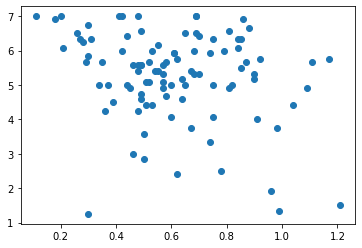

[[ 0.05336605 -0.07752935]
 [-0.07752935  1.66420507]]
Pearsons correlation: -0.260
p value: 0.0093
Reject the null hypothesis that the means are equal.


In [957]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

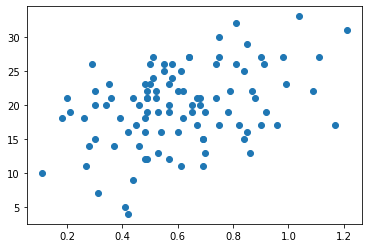

[[ 0.05336605  0.50751391]
 [ 0.50751391 32.96103896]]
Pearsons correlation: 0.383
p value: 0.0001
Reject the null hypothesis that the means are equal.


In [958]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

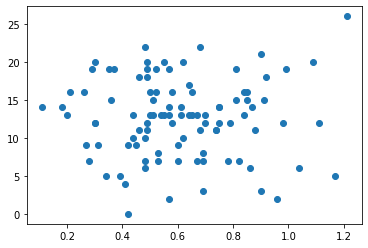

[[5.33660482e-02 2.51669759e-02]
 [2.51669759e-02 2.66798598e+01]]
Pearsons correlation: 0.021
p value: 0.8358
Accept null hypothesis that the means are equal.


In [959]:
#sum of nonsocial  / iri_pd
pyplot.scatter(nonsocial_sum, iri_pd)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

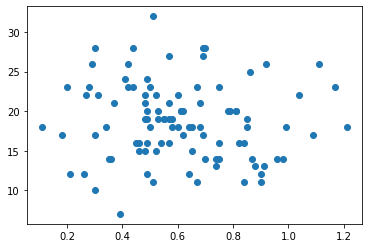

[[ 0.05336605 -0.07016698]
 [-0.07016698 23.48258091]]
Pearsons correlation: -0.063
p value: 0.5377
Accept null hypothesis that the means are equal.


In [960]:
#sum of nonsocial  / iri_pt
pyplot.scatter(nonsocial_sum, iri_pt)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

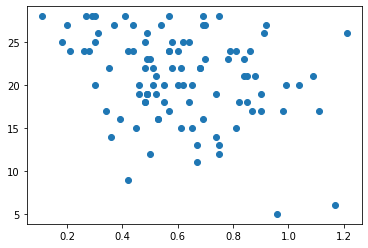

[[ 0.05336605 -0.34329314]
 [-0.34329314 25.57884972]]
Pearsons correlation: -0.294
p value: 0.0032
Reject the null hypothesis that the means are equal.


In [961]:
#sum of nonsocial  / iri_ec
pyplot.scatter(nonsocial_sum, iri_ec)
pyplot.show()
covariance = cov(nonsocial_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    

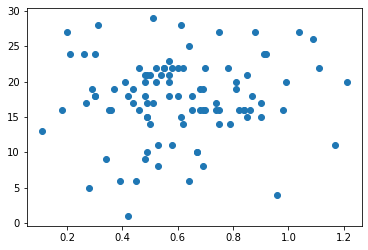

[[ 0.05336605  0.09721707]
 [ 0.09721707 32.46773861]]
Pearsons correlation: 0.074
p value: 0.4675
Accept null hypothesis that the means are equal.


In [962]:
#sum of nonsocial  / iri_fs
pyplot.scatter(nonsocial_sum, iri_fs)
pyplot.show()
covariance = cov(nonsocial_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [963]:
##########################################################################

In [964]:
# study 2 --  balanced trial spreadsheet only - online + person

In [965]:
##########################################################################

In [966]:
#import excel file containing data summary
balanced_wtpdata = wtpdata.loc[(wtpdata['balanced'] == 1)]
balanced_wtpdata= balanced_wtpdata.reset_index(drop=True)
print(balanced_wtpdata)

                  participant  balanced  avg_spent_social  \
0    56259489ed6e5a0005c80fde         1          0.026250   
1    58060d08b869700001d70b8c         1          0.030357   
2    5914b7b50a4b9d0001add64f         1          0.020870   
3    5a78e410ae9a0b0001a97274         1          0.036190   
4    5adbc051f6b58c0001fa3bbe         1          0.031111   
5    5af529ca222e4d0001878444         1          0.024286   
6    5b48f2d0ff7497000125165e         1          0.030833   
7    5bb0c112a1c73d0001b9ce9e         1          0.031875   
8    5beaed3f0af61d0001968d9a         1          0.033846   
9    5bfadc1846911f0001d7d1eb         1          0.035333   
10   5c1a8a5e2a85450001a878cd         1          0.023333   
11   5c3cd553c21f060001c3e571         1          0.021667   
12   5c4e7b34620ba700010c5dc6         1          0.023043   
13   5c523d16102de10001022098         1          0.029211   
14   5d14cea059c33d0001f19bb3         1          0.026000   
15   5d17ce93ac37cd00195

In [967]:
socialavg= balanced_wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.029007387304
standard error of the mean: 0.000347326570


In [968]:
nonsocialavg = balanced_wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
old_nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))


group mean: 0.028678335190
standard error of the mean: 0.000320750053


In [969]:
#sample size
n = len(balanced_wtpdata)
print(n)

207


In [970]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.002931194782844866 0.016030525000000018
0.003771349160180701


In [971]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0002621268867799066


In [972]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

1.2553161509261375


In [973]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

206


In [974]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.255, df=206, cv=1.652, p=0.211
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


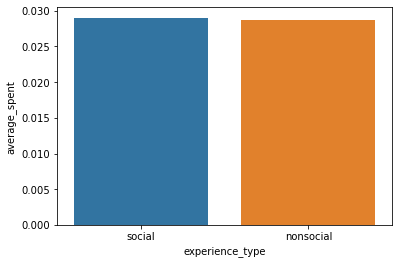

In [975]:
balanced_wtpdata_wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

balanced_wtpdata_wtp_plot = sns.barplot(x=balanced_wtpdata_wtp_means.experience_type, y=balanced_wtpdata_wtp_means.average_spent, data=balanced_wtpdata_wtp_means)

In [976]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.016100990143990482


In [977]:
prop_social = balanced_wtpdata['prop_social']
aq = balanced_wtpdata.AQ #autism quotient
mspss = balanced_wtpdata.MSPSS #perceived social support
iri_pd = balanced_wtpdata.IRI_PD
iri_fs= balanced_wtpdata.IRI_FS
iri_ec= balanced_wtpdata.IRI_EC
iri_pt=balanced_wtpdata.IRI_PT

In [978]:
### average spent on social / self report ####

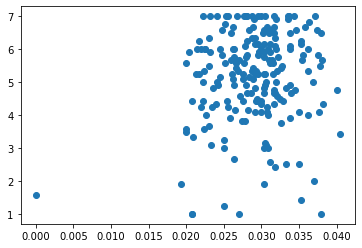

[[2.49715995e-05 1.00065637e-03]
 [1.00065637e-03 1.96285776e+00]]
Pearsons correlation: 0.143
p value: 0.0399
Reject the null hypothesis that the means are equal.


In [979]:
# avg amount spent on social / mspss
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


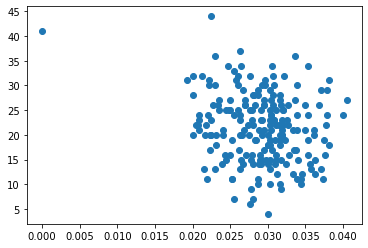

[[ 2.49715995e-05 -7.26311429e-03]
 [-7.26311429e-03  4.89696543e+01]]
Pearsons correlation: -0.208
p value: 0.0027
Reject the null hypothesis that the means are equal.


In [980]:
#avg amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

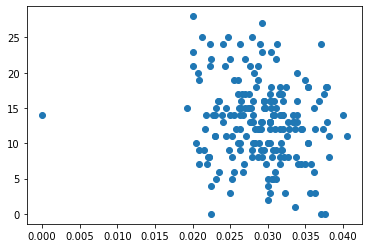

[[ 2.49715995e-05 -4.20013952e-03]
 [-4.20013952e-03  3.13267201e+01]]
Pearsons correlation: -0.150
p value: 0.0308
Reject the null hypothesis that the means are equal.


In [981]:
#avg amount spent on social / iri_pd
pyplot.scatter(socialavg, iri_pd)
pyplot.show()
covariance = cov(socialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




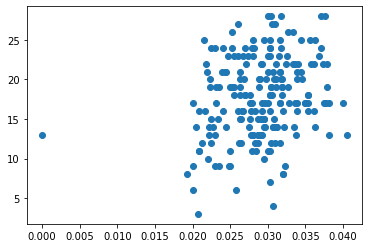

[[2.49715995e-05 6.51897557e-03]
 [6.51897557e-03 2.67425074e+01]]
Pearsons correlation: 0.252
p value: 0.0002
Reject the null hypothesis that the means are equal.


In [982]:
#avg amount spent on social / iri_pt
pyplot.scatter(socialavg, iri_pt)
pyplot.show()
covariance = cov(socialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


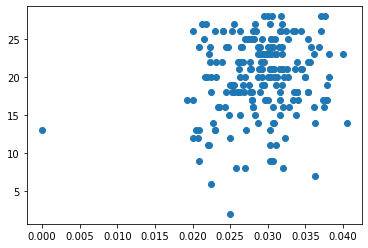

[[2.49715995e-05 3.86528165e-03]
 [3.86528165e-03 2.48197552e+01]]
Pearsons correlation: 0.155
p value: 0.0255
Reject the null hypothesis that the means are equal.


In [983]:
#avg amount spent on social / iri_ec
pyplot.scatter(socialavg, iri_ec)
pyplot.show()
covariance = cov(socialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(socialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




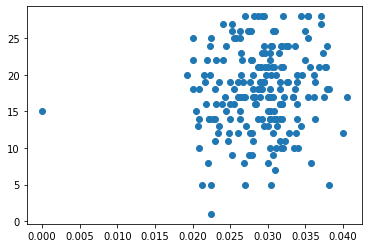

[[2.49715995e-05 3.13236128e-03]
 [3.13236128e-03 3.17518409e+01]]
Pearsons correlation: 0.111
p value: 0.1105
Accept null hypothesis that the means are equal.


In [984]:
#avg amount spent on social / iri_fs
pyplot.scatter(socialavg, iri_fs)
pyplot.show()
covariance = cov(socialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(socialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




In [985]:
##### prop of chosen social // self report #####

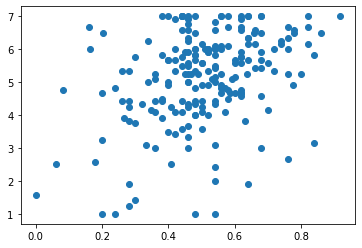

[[0.02508348 0.08177612]
 [0.08177612 1.96285776]]
Pearsons correlation: 0.369
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [986]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

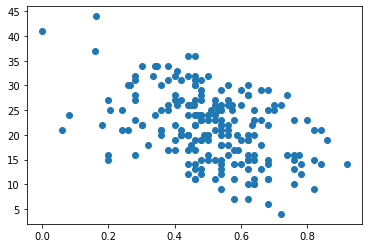

[[ 2.50834817e-02 -4.87807277e-01]
 [-4.87807277e-01  4.89696543e+01]]
Pearsons correlation: -0.440
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [987]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

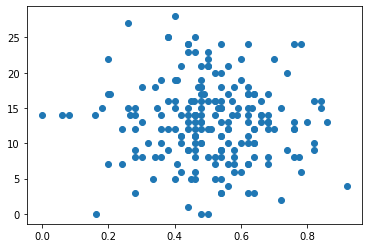

[[ 2.50834817e-02 -4.31942275e-02]
 [-4.31942275e-02  3.13267201e+01]]
Pearsons correlation: -0.049
p value: 0.4857
Accept null hypothesis that the means are equal.


In [988]:
# prop social // iri_pd
pyplot.scatter(prop_social, iri_pd)
pyplot.show()
covariance = cov(prop_social, iri_pd)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pd)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

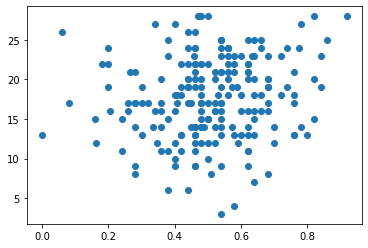

[[2.50834817e-02 1.21750717e-01]
 [1.21750717e-01 2.67425074e+01]]
Pearsons correlation: 0.149
p value: 0.0325
Reject the null hypothesis that the means are equal.


In [989]:
# prop social // iri_pt
pyplot.scatter(prop_social, iri_pt)
pyplot.show()
covariance = cov(prop_social, iri_pt)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pt)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

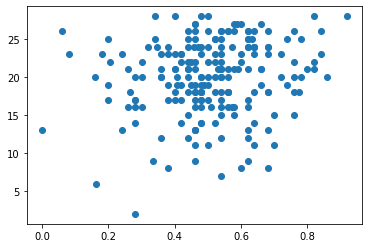

[[ 0.02508348  0.1234211 ]
 [ 0.1234211  24.81975517]]
Pearsons correlation: 0.156
p value: 0.0244
Reject the null hypothesis that the means are equal.


In [990]:
# prop social // iri_ec
pyplot.scatter(prop_social, iri_ec)
pyplot.show()
covariance = cov(prop_social, iri_ec)
print(covariance)
corr, _ = pearsonr(prop_social, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_ec)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

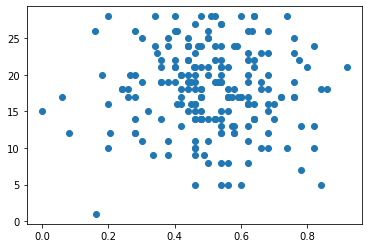

[[ 2.50834817e-02 -1.78106795e-02]
 [-1.78106795e-02  3.17518409e+01]]
Pearsons correlation: -0.020
p value: 0.7753
Accept null hypothesis that the means are equal.


In [991]:
# prop social // iri_fs
pyplot.scatter(prop_social, iri_fs)
pyplot.show()
covariance = cov(prop_social, iri_fs)
print(covariance)
corr, _ = pearsonr(prop_social, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_fs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [992]:
##### avg spent on nonsocial // self report #####

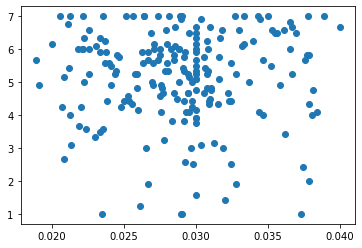

[[2.12962834e-05 9.61093400e-06]
 [9.61093400e-06 1.96285776e+00]]
Pearsons correlation: 0.001
p value: 0.9830
Accept null hypothesis that the means are equal.


In [993]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

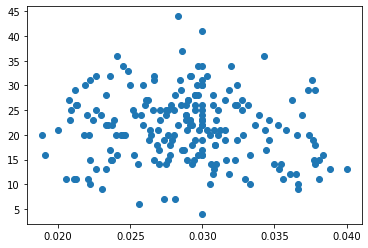

[[ 2.12962834e-05 -3.49309711e-03]
 [-3.49309711e-03  4.89696543e+01]]
Pearsons correlation: -0.108
p value: 0.1208
Accept null hypothesis that the means are equal.


In [994]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

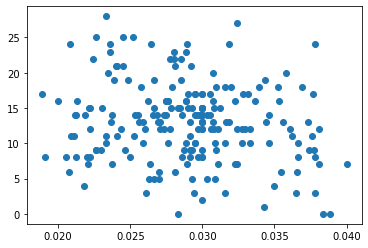

[[ 2.12962834e-05 -4.54673685e-03]
 [-4.54673685e-03  3.13267201e+01]]
Pearsons correlation: -0.176
p value: 0.0112
Reject the null hypothesis that the means are equal.


In [995]:
# nonsocial // iri_pd
pyplot.scatter(nonsocialavg, iri_pd)
pyplot.show()
covariance = cov(nonsocialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

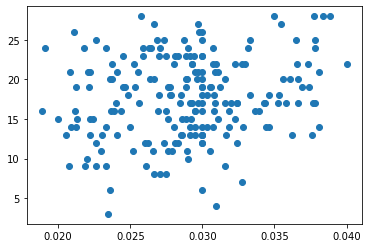

[[2.12962834e-05 4.68207879e-03]
 [4.68207879e-03 2.67425074e+01]]
Pearsons correlation: 0.196
p value: 0.0046
Reject the null hypothesis that the means are equal.


In [996]:
# nonsocial // iri_pt
pyplot.scatter(nonsocialavg, iri_pt)
pyplot.show()
covariance = cov(nonsocialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

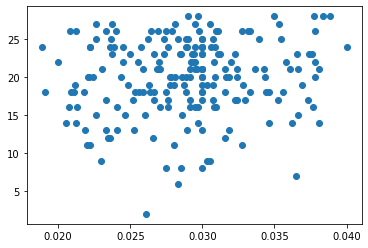

[[2.12962834e-05 2.63473800e-03]
 [2.63473800e-03 2.48197552e+01]]
Pearsons correlation: 0.115
p value: 0.1001
Accept null hypothesis that the means are equal.


In [997]:
# nonsocial // iri_ec
pyplot.scatter(nonsocialavg, iri_ec)
pyplot.show()
covariance = cov(nonsocialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

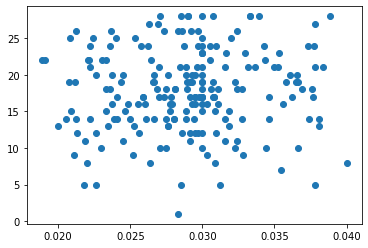

[[2.12962834e-05 1.57702511e-03]
 [1.57702511e-03 3.17518409e+01]]
Pearsons correlation: 0.061
p value: 0.3854
Accept null hypothesis that the means are equal.


In [998]:
# nonsocial // iri_fs
pyplot.scatter(nonsocialavg, iri_fs)
pyplot.show()
covariance = cov(nonsocialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [999]:
###################################

In [1000]:
#### t stat for proportions ####

In [1001]:
prop_socialavg= balanced_wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocialavg= balanced_wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.507606438986
mean: 0.492393561014


In [1002]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

20.71669531093392 3.14906574
0.3167553108964547


In [1003]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.022016016017013598


In [1004]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

0.690991410946388


In [1005]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

206


In [1006]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=0.691, df=206, cv=1.652, p=0.490
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


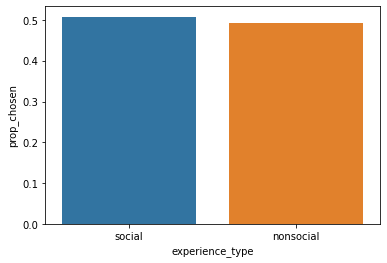

In [1007]:
balanced_wtpdata_prop_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

balanced_wtpdata_prop_wtp_plot = sns.barplot(x=balanced_wtpdata_prop_means.experience_type, y=balanced_wtpdata_prop_means.prop_chosen, data=balanced_wtpdata_prop_means)


In [1008]:
###################################

In [1009]:
#### t stats for sums #####

In [1010]:
social_sum= balanced_wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))

mean: 0.737971014493


In [1011]:
nonsocial_sum= balanced_wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.709130434783


In [1012]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

46.5677 5.969999999999997


In [1013]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.47457452451239646


In [1014]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.03298520963503907


In [1015]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

0.8743488378351397


In [1016]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

206


In [1017]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=0.874, df=206, cv=1.652, p=0.383
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


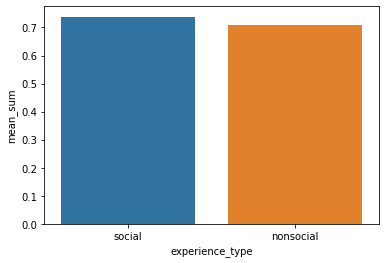

In [1018]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)


In [1019]:
#### sum // self-report ####

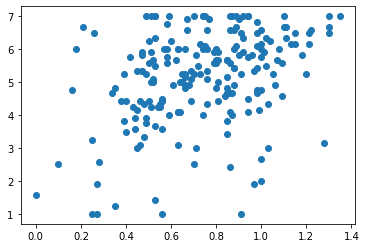

[[0.06806577 0.13292886]
 [0.13292886 1.96285776]]
Pearsons correlation: 0.364
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1020]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

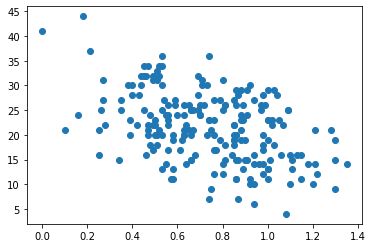

[[ 0.06806577 -0.81698537]
 [-0.81698537 48.96965433]]
Pearsons correlation: -0.447
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1021]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

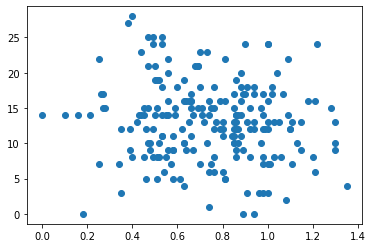

[[ 0.06806577 -0.16517307]
 [-0.16517307 31.32672014]]
Pearsons correlation: -0.113
p value: 0.1046
Accept null hypothesis that the means are equal.


In [1022]:
#sum of social / iri_pd
pyplot.scatter(social_sum, iri_pd)
pyplot.show()
covariance = cov(social_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

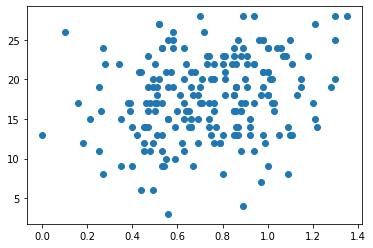

[[ 0.06806577  0.30317434]
 [ 0.30317434 26.74250739]]
Pearsons correlation: 0.225
p value: 0.0011
Reject the null hypothesis that the means are equal.


In [1023]:
#sum of social / iri_pt
pyplot.scatter(social_sum, iri_pt)
pyplot.show()
covariance = cov(social_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

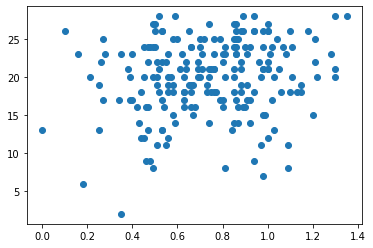

[[ 0.06806577  0.22503588]
 [ 0.22503588 24.81975517]]
Pearsons correlation: 0.173
p value: 0.0126
Reject the null hypothesis that the means are equal.


In [1024]:
#sum of social / iri_ec
pyplot.scatter(social_sum, iri_ec)
pyplot.show()
covariance = cov(social_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(social_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

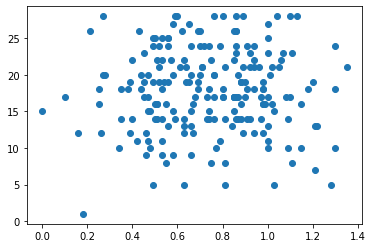

[[6.80657661e-02 2.44019980e-02]
 [2.44019980e-02 3.17518409e+01]]
Pearsons correlation: 0.017
p value: 0.8124
Accept null hypothesis that the means are equal.


In [1025]:
#sum of social / iri_fs
pyplot.scatter(social_sum, iri_fs)
pyplot.show()
covariance = cov(social_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(social_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

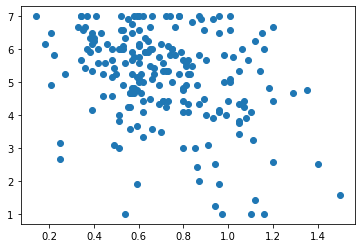

[[ 0.06586235 -0.12156782]
 [-0.12156782  1.96285776]]
Pearsons correlation: -0.338
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1026]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

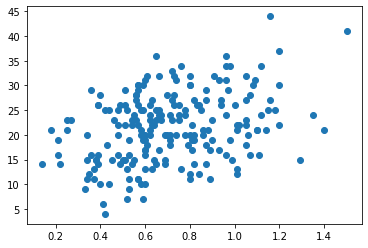

[[ 0.06586235  0.6316526 ]
 [ 0.6316526  48.96965433]]
Pearsons correlation: 0.352
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1027]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

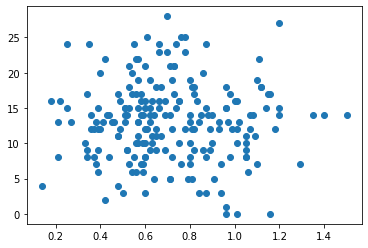

[[ 0.06586235 -0.03174546]
 [-0.03174546 31.32672014]]
Pearsons correlation: -0.022
p value: 0.7519
Accept null hypothesis that the means are equal.


In [1028]:
#sum of nonsocial  / iri_pd
pyplot.scatter(nonsocial_sum, iri_pd)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

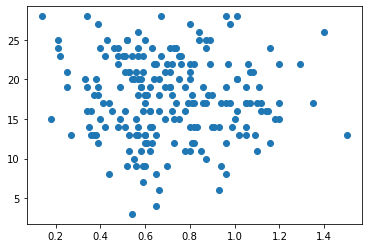

[[ 0.06586235 -0.07210004]
 [-0.07210004 26.74250739]]
Pearsons correlation: -0.054
p value: 0.4369
Accept null hypothesis that the means are equal.


In [1029]:
#sum of nonsocial  / iri_pt
pyplot.scatter(nonsocial_sum, iri_pt)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

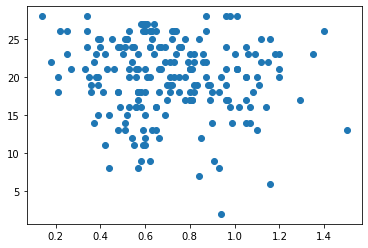

[[ 0.06586235 -0.11402068]
 [-0.11402068 24.81975517]]
Pearsons correlation: -0.089
p value: 0.2013
Accept null hypothesis that the means are equal.


In [1030]:
#sum of nonsocial  / iri_ec
pyplot.scatter(nonsocial_sum, iri_ec)
pyplot.show()
covariance = cov(nonsocial_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

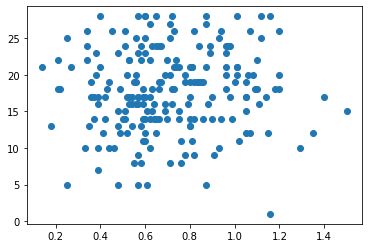

[[ 0.06586235  0.08511819]
 [ 0.08511819 31.75184091]]
Pearsons correlation: 0.059
p value: 0.3995
Accept null hypothesis that the means are equal.


In [1031]:
#sum of nonsocial  / iri_fs
pyplot.scatter(nonsocial_sum, iri_fs)
pyplot.show()
covariance = cov(nonsocial_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [1032]:
##########################################################################

In [1033]:
# study 2 - balanced spreadsheet - online only

In [1034]:
##########################################################################

In [1035]:
#import excel file containing data summary
balanced_wtpdata =  pd.DataFrame()
for i in range(0,len(wtpdata)):
    if not wtpdata.loc[i,'participant'].startswith('wtp'):
        balanced_wtpdata[i] = wtpdata.loc[i]

balanced_wtpdata= balanced_wtpdata.transpose()
print(balanced_wtpdata)


                  participant balanced avg_spent_social avg_spent_nonsocial  \
0    549ea92efdf99b4ffa5fa208        0            0.032            0.030333   
1    55a43687fdf99b7da1908e0f        0         0.018889            0.018261   
2    55ea70c37480920010aa9982        0            0.031             0.02925   
3    56259489ed6e5a0005c80fde        1          0.02625            0.028571   
4    566c9284d408ea000519c6d7        0         0.018889            0.017826   
5    56f745653bd969000d170c15        0         0.033333            0.028929   
6    57e972d7c3e5930001447bb1        0             0.03            0.028235   
7    58060d08b869700001d70b8c        1         0.030357            0.025909   
8    58ab75c4ef58a9000119d16c        0         0.023684            0.022667   
9    5914b7b50a4b9d0001add64f        1          0.02087            0.022963   
10   5a78e410ae9a0b0001a97274        1          0.03619            0.036552   
11   5adbc051f6b58c0001fa3bbe        1         0.031

In [1036]:
socialavg= balanced_wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.029276040559
standard error of the mean: 0.000337451719


In [1037]:
nonsocialavg = balanced_wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences
old_nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))


group mean: 0.028678335190
standard error of the mean: 0.000307092942


In [1038]:
#sample size
n = len(balanced_wtpdata)
print(n)

261


In [1039]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.003703889130237575 0.15303734600000007
0.003728350679257867


In [1040]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00023077911340914356


In [1041]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

2.5899456877897387


In [1042]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

260


In [1043]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=2.590, df=260, cv=1.651, p=0.010
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


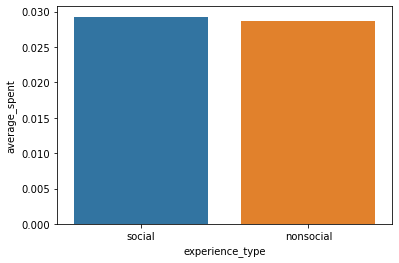

In [1044]:
balanced_wtpdata_wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

balanced_wtpdata_wtp_plot = sns.barplot(x=balanced_wtpdata_wtp_means.experience_type, y=balanced_wtpdata_wtp_means.average_spent, data=balanced_wtpdata_wtp_means)

In [1045]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.11249479633513565


In [1046]:
prop_social = pd.to_numeric(balanced_wtpdata['prop_social'])
aq = pd.to_numeric(balanced_wtpdata.AQ) #autism quotient
mspss = pd.to_numeric(balanced_wtpdata.MSPSS) #perceived social support
iri_pd = pd.to_numeric(balanced_wtpdata.IRI_PD)
iri_fs= pd.to_numeric(balanced_wtpdata.IRI_FS)
iri_ec= pd.to_numeric(balanced_wtpdata.IRI_EC)
iri_pt=pd.to_numeric(balanced_wtpdata.IRI_PT)
socialavg = pd.to_numeric(socialavg)
nonsocialavg=pd.to_numeric(nonsocialavg)

In [1047]:
### average spent on social / self report ####

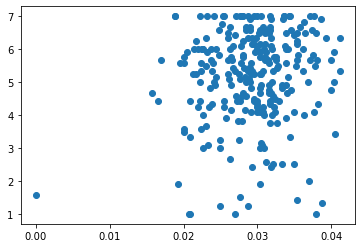

[[2.97210260e-05 8.80915053e-04]
 [8.80915053e-04 2.01102044e+00]]
Pearsons correlation: 0.114
p value: 0.0661
Reject the null hypothesis that the means are equal.


In [1048]:
# avg amount spent on social / mspss
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


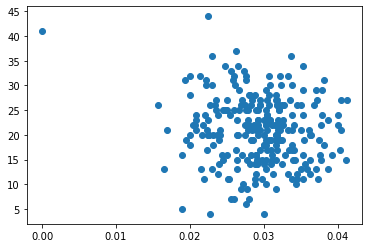

[[ 2.97210260e-05 -4.51945042e-03]
 [-4.51945042e-03  4.68422045e+01]]
Pearsons correlation: -0.121
p value: 0.0506
Reject the null hypothesis that the means are equal.


In [1049]:
#avg amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

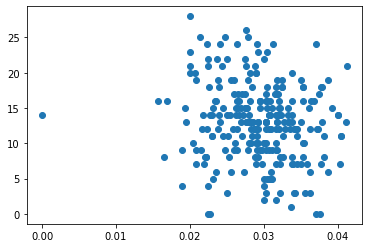

[[ 2.97210260e-05 -4.18726589e-03]
 [-4.18726589e-03  3.00730622e+01]]
Pearsons correlation: -0.140
p value: 0.0236
Reject the null hypothesis that the means are equal.


In [1050]:
#avg amount spent on social / iri_pd
pyplot.scatter(socialavg, iri_pd)
pyplot.show()
covariance = cov(socialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




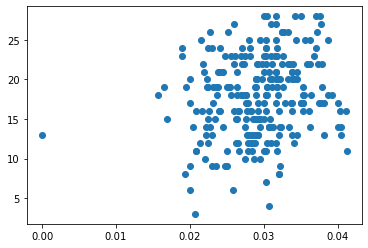

[[2.97210260e-05 5.32307915e-03]
 [5.32307915e-03 2.61021220e+01]]
Pearsons correlation: 0.191
p value: 0.0019
Reject the null hypothesis that the means are equal.


In [1051]:
#avg amount spent on social / iri_pt
pyplot.scatter(socialavg, iri_pt)
pyplot.show()
covariance = cov(socialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(socialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


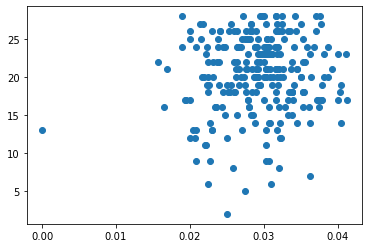

[[2.97210260e-05 2.64881529e-03]
 [2.64881529e-03 2.51968170e+01]]
Pearsons correlation: 0.097
p value: 0.1188
Accept null hypothesis that the means are equal.


In [1052]:
#avg amount spent on social / iri_ec
pyplot.scatter(socialavg, iri_ec)
pyplot.show()
covariance = cov(socialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(socialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




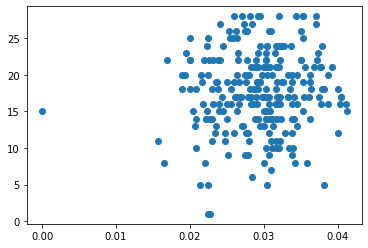

[[2.97210260e-05 2.34166864e-03]
 [2.34166864e-03 2.90851459e+01]]
Pearsons correlation: 0.080
p value: 0.1996
Accept null hypothesis that the means are equal.


In [1053]:
#avg amount spent on social / iri_fs
pyplot.scatter(socialavg, iri_fs)
pyplot.show()
covariance = cov(socialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(socialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')




In [1054]:
##### prop of chosen social // self report #####

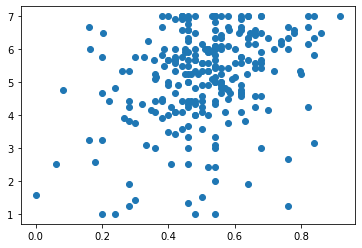

[[0.02344782 0.06776816]
 [0.06776816 2.01102044]]
Pearsons correlation: 0.312
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1055]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

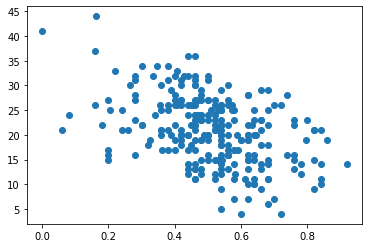

[[ 2.34478154e-02 -4.63124686e-01]
 [-4.63124686e-01  4.68422045e+01]]
Pearsons correlation: -0.442
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1056]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

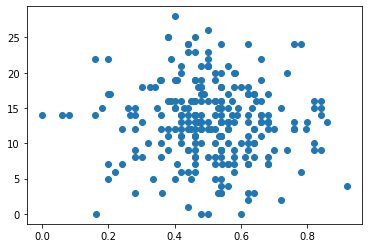

[[ 2.34478154e-02 -4.27216344e-02]
 [-4.27216344e-02  3.00730622e+01]]
Pearsons correlation: -0.051
p value: 0.4131
Accept null hypothesis that the means are equal.


In [1057]:
# prop social // iri_pd
pyplot.scatter(prop_social, iri_pd)
pyplot.show()
covariance = cov(prop_social, iri_pd)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pd)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

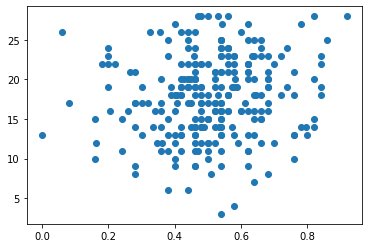

[[2.34478154e-02 9.53287702e-02]
 [9.53287702e-02 2.61021220e+01]]
Pearsons correlation: 0.122
p value: 0.0492
Reject the null hypothesis that the means are equal.


In [1058]:
# prop social // iri_pt
pyplot.scatter(prop_social, iri_pt)
pyplot.show()
covariance = cov(prop_social, iri_pt)
print(covariance)
corr, _ = pearsonr(prop_social, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_pt)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

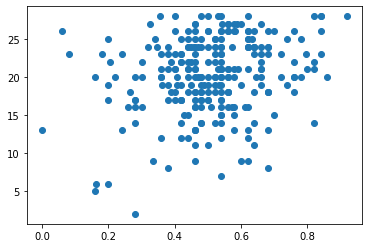

[[2.34478154e-02 1.75007520e-01]
 [1.75007520e-01 2.51968170e+01]]
Pearsons correlation: 0.228
p value: 0.0002
Reject the null hypothesis that the means are equal.


In [1059]:
# prop social // iri_ec
pyplot.scatter(prop_social, iri_ec)
pyplot.show()
covariance = cov(prop_social, iri_ec)
print(covariance)
corr, _ = pearsonr(prop_social, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_ec)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

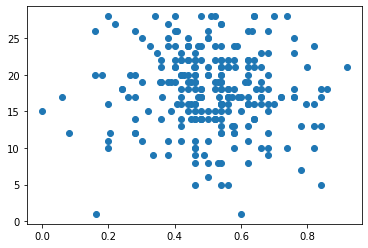

[[ 2.34478154e-02 -3.90750828e-02]
 [-3.90750828e-02  2.90851459e+01]]
Pearsons correlation: -0.047
p value: 0.4465
Accept null hypothesis that the means are equal.


In [1060]:
# prop social // iri_fs
pyplot.scatter(prop_social, iri_fs)
pyplot.show()
covariance = cov(prop_social, iri_fs)
print(covariance)
corr, _ = pearsonr(prop_social, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, iri_fs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [1061]:
##### avg spent on nonsocial // self report #####

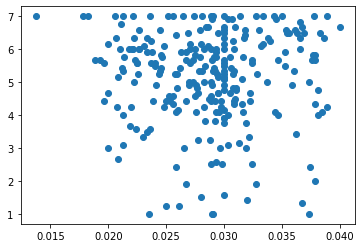

[[ 2.46138856e-05 -1.40717937e-04]
 [-1.40717937e-04  2.01102044e+00]]
Pearsons correlation: -0.020
p value: 0.7478
Accept null hypothesis that the means are equal.


In [1062]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

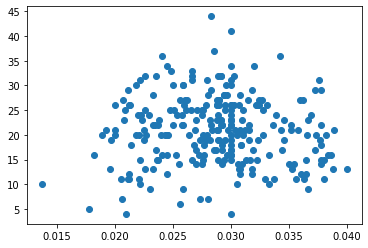

[[ 2.46138856e-05 -6.55427165e-04]
 [-6.55427165e-04  4.68422045e+01]]
Pearsons correlation: -0.019
p value: 0.7563
Accept null hypothesis that the means are equal.


In [1063]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

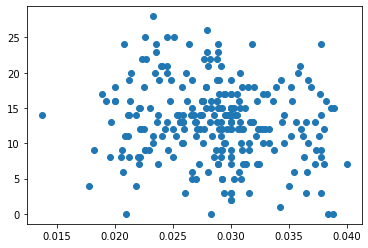

[[ 2.46138856e-05 -4.08748772e-03]
 [-4.08748772e-03  3.00730622e+01]]
Pearsons correlation: -0.150
p value: 0.0151
Reject the null hypothesis that the means are equal.


In [1064]:
# nonsocial // iri_pd
pyplot.scatter(nonsocialavg, iri_pd)
pyplot.show()
covariance = cov(nonsocialavg, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

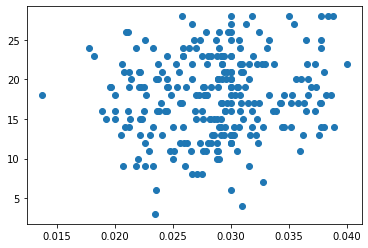

[[2.46138856e-05 3.21300083e-03]
 [3.21300083e-03 2.61021220e+01]]
Pearsons correlation: 0.127
p value: 0.0407
Reject the null hypothesis that the means are equal.


In [1065]:
# nonsocial // iri_pt
pyplot.scatter(nonsocialavg, iri_pt)
pyplot.show()
covariance = cov(nonsocialavg, iri_pt)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

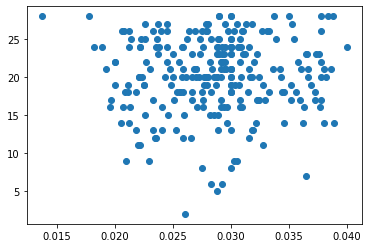

[[2.46138856e-05 6.51966525e-04]
 [6.51966525e-04 2.51968170e+01]]
Pearsons correlation: 0.026
p value: 0.6738
Accept null hypothesis that the means are equal.


In [1066]:
# nonsocial // iri_ec
pyplot.scatter(nonsocialavg, iri_ec)
pyplot.show()
covariance = cov(nonsocialavg, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

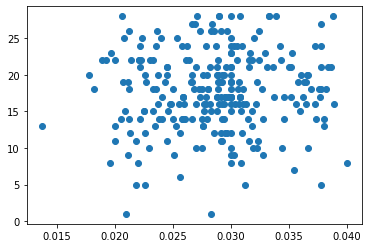

[[2.46138856e-05 1.53920345e-03]
 [1.53920345e-03 2.90851459e+01]]
Pearsons correlation: 0.058
p value: 0.3546
Accept null hypothesis that the means are equal.


In [1067]:
# nonsocial // iri_fs
pyplot.scatter(nonsocialavg, iri_fs)
pyplot.show()
covariance = cov(nonsocialavg, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocialavg, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [1068]:
###################################

In [1069]:
#### t stat for proportions ####

In [1070]:
prop_socialavg= pd.to_numeric(balanced_wtpdata.prop_social)
#calculate group mean for prop of chosen social experiences
prop_soc_M = mean(prop_socialavg)
print('mean: %.12f'% (prop_soc_M))


prop_nonsocialavg= pd.to_numeric(balanced_wtpdata.prop_nonsocial)
#calculate group mean for prop of chosen social experiences
prop_nonsoc_M = mean(prop_nonsocialavg)
print('mean: %.12f'% (prop_nonsoc_M))

mean: 0.509533341448
mean: 0.490466658552


In [1071]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(prop_socialavg[i]-prop_nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([prop_socialavg[i]-prop_nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

24.480611533662834 4.976404236000002
0.3062535903219998


In [1072]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.018956621340926683


In [1073]:
# calculate the t statistic
t_stat = (prop_soc_M - prop_nonsoc_M) / sed
print(t_stat)

1.0058059689881245


In [1074]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

260


In [1075]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.006, df=260, cv=1.651, p=0.315
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


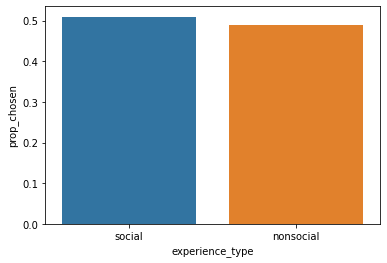

In [1076]:
balanced_wtpdata_prop_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [prop_soc_M, prop_nonsoc_M]})

balanced_wtpdata_prop_wtp_plot = sns.barplot(x=balanced_wtpdata_prop_means.experience_type, y=balanced_wtpdata_prop_means.prop_chosen, data=balanced_wtpdata_prop_means)


In [1077]:
###################################

In [1078]:
#### t stats for sums #####

In [1079]:
social_sum= pd.to_numeric(balanced_wtpdata.total_spent_social)
#calculate group mean for prop of chosen social experiences
social_sum_M = mean(social_sum)
print('mean: %.12f'% (social_sum_M))

mean: 0.746091954023


In [1080]:
nonsocial_sum= pd.to_numeric(balanced_wtpdata.total_spent_nonsocial)
#calculate group mean for prop of chosen social experiences
nonsocial_sum_M = mean(nonsocial_sum)
print('mean: %.12f'% (nonsocial_sum_M))

mean: 0.698697318008


In [1081]:
# sum squared difference between observations
d1 = sum([(social_sum[i]-nonsocial_sum[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([social_sum[i]-nonsocial_sum[i] for i in range(n)])
print(d1,d2)

54.6457 12.370000000000003


In [1082]:
# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.45598341886389826


In [1083]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.028224665056353297


In [1084]:
# calculate the t statistic
t_stat = (social_sum_M - nonsocial_sum_M) / sed
print(t_stat)

1.6791921505781437


In [1085]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

260


In [1086]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=1.679, df=260, cv=1.651, p=0.094
Reject the null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


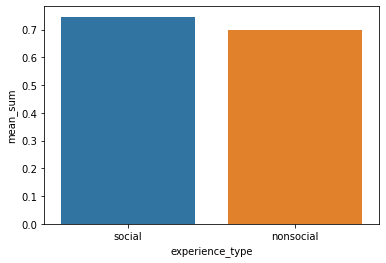

In [1087]:
wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [social_sum_M, nonsocial_sum_M]})

wtp_plot = sns.barplot(x=wtp_sum_means.experience_type, y=wtp_sum_means.mean_sum, data=wtp_sum_means)


In [1088]:
#### sum // self-report ####

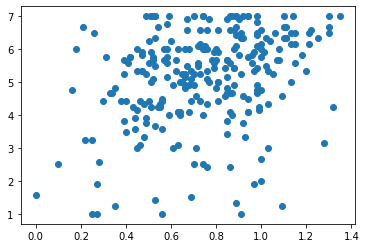

[[0.06843698 0.11023578]
 [0.11023578 2.01102044]]
Pearsons correlation: 0.297
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1089]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(social_sum, mspss)
pyplot.show()
covariance = cov(social_sum, mspss)
print(covariance)
corr, _ = pearsonr(social_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

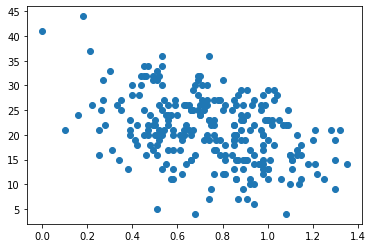

[[ 0.06843698 -0.72249956]
 [-0.72249956 46.84220454]]
Pearsons correlation: -0.404
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1090]:
#sum of social / aq
pyplot.scatter(social_sum, aq)
pyplot.show()
covariance = cov(social_sum, aq)
print(covariance)
corr, _ = pearsonr(social_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

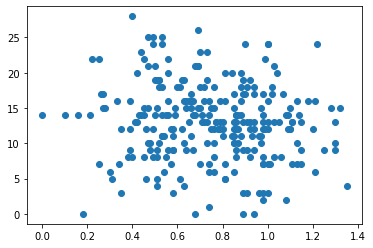

[[ 0.06843698 -0.16194651]
 [-0.16194651 30.07306219]]
Pearsons correlation: -0.113
p value: 0.0686
Reject the null hypothesis that the means are equal.


In [1091]:
#sum of social / iri_pd
pyplot.scatter(social_sum, iri_pd)
pyplot.show()
covariance = cov(social_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

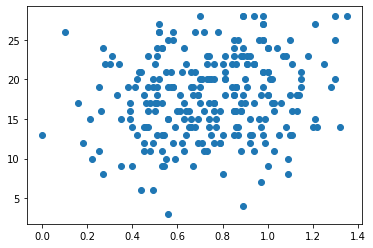

[[ 0.06843698  0.23783554]
 [ 0.23783554 26.10212202]]
Pearsons correlation: 0.178
p value: 0.0039
Reject the null hypothesis that the means are equal.


In [1092]:
#sum of social / iri_pt
pyplot.scatter(social_sum, iri_pt)
pyplot.show()
covariance = cov(social_sum, iri_pt)
print(covariance)
corr, _ = pearsonr(social_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

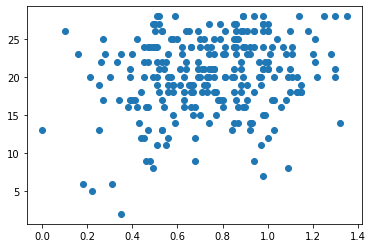

[[ 0.06843698  0.27491379]
 [ 0.27491379 25.19681698]]
Pearsons correlation: 0.209
p value: 0.0007
Reject the null hypothesis that the means are equal.


In [1093]:
#sum of social / iri_ec
pyplot.scatter(social_sum, iri_ec)
pyplot.show()
covariance = cov(social_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(social_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

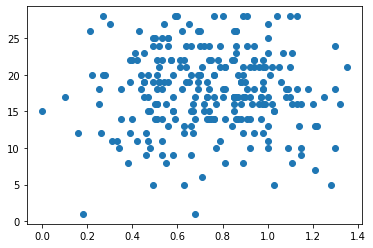

[[ 6.84369761e-02 -1.95437666e-02]
 [-1.95437666e-02  2.90851459e+01]]
Pearsons correlation: -0.014
p value: 0.8237
Accept null hypothesis that the means are equal.


In [1094]:
#sum of social / iri_fs
pyplot.scatter(social_sum, iri_fs)
pyplot.show()
covariance = cov(social_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(social_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(social_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

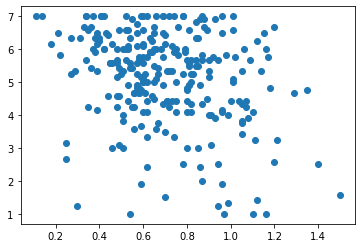

[[ 0.0616106  -0.1040635 ]
 [-0.1040635   2.01102044]]
Pearsons correlation: -0.296
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1095]:
#sum of nonsocial / mulitdimensional scale of perceived social support
pyplot.scatter(nonsocial_sum, mspss)
pyplot.show()
covariance = cov(nonsocial_sum, mspss)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

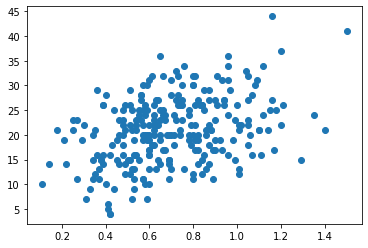

[[ 0.0616106   0.64257707]
 [ 0.64257707 46.84220454]]
Pearsons correlation: 0.378
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [1096]:
#sum of nonsocial  / aq
pyplot.scatter(nonsocial_sum, aq)
pyplot.show()
covariance = cov(nonsocial_sum, aq)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

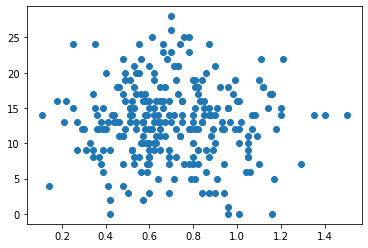

[[ 6.16106042e-02 -2.86872974e-02]
 [-2.86872974e-02  3.00730622e+01]]
Pearsons correlation: -0.021
p value: 0.7347
Accept null hypothesis that the means are equal.


In [1097]:
#sum of nonsocial  / iri_pd
pyplot.scatter(nonsocial_sum, iri_pd)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pd)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [1098]:
#sum of nonsocial  / iri_pt
pyplot.scatter(nonsocial_sum, iri_pt)
pyplot.show()
covariance = cov(nonsocial_sum, iri_pt)
print(covariance)
corr, _ = pearson r(nonsocial_sum, iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

SyntaxError: invalid syntax (<ipython-input-1098-2a4f27b5a750>, line 6)

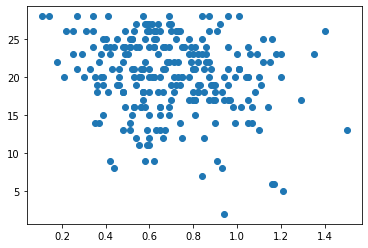

[[ 0.0616106  -0.23064412]
 [-0.23064412 25.19681698]]
Pearsons correlation: -0.185
p value: 0.0027
Reject the null hypothesis that the means are equal.


In [1099]:
#sum of nonsocial  / iri_ec
pyplot.scatter(nonsocial_sum, iri_ec)
pyplot.show()
covariance = cov(nonsocial_sum, iri_ec)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

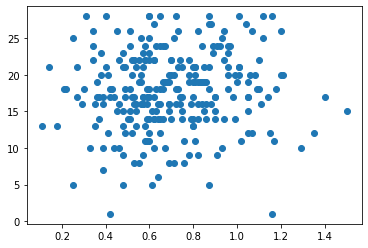

[[ 0.0616106   0.10633156]
 [ 0.10633156 29.08514589]]
Pearsons correlation: 0.079
p value: 0.2008
Accept null hypothesis that the means are equal.


In [1100]:
#sum of nonsocial  / iri_fs
pyplot.scatter(nonsocial_sum, iri_fs)
pyplot.show()
covariance = cov(nonsocial_sum, iri_fs)
print(covariance)
corr, _ = pearsonr(nonsocial_sum, iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocial_sum, iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')